# To answer following Questions

In [4]:
## 1) Top 5 states with most number of colleges
## 2) Are there any correlations among columns
## 3) In particular, is there any relation between
###    a) total cost per year and salary yardstick
###    b) 4 year graduation rate and admission rate
###    c) total cost per year and average debt at graduation    

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Import the stats librayr from numpy
from scipy import stats, integrate

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
new_style = {'grid': True}
sns.set_style('whitegrid')

# Command so that plots appear in the iPython Notebook
%matplotlib inline

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 12 days


In [3]:
from bs4 import BeautifulSoup as bsoup
import requests as rq
import re

url = 'http://www.kiplinger.com/tool/college/T014-S001-kiplinger-s-best-values-in-private-colleges/index.php'
r = rq.get(url)
records=[]

soup = bsoup(r.text)

table1 =  soup.find_all('tr',{'class' : re.compile('all')})

for tr in table1:
    for td in tr:
        if td.string != "\n":
            records.append(td.string)
records_formatted = [records[i:i+11] for i in range(0,len(records),11)]

In [4]:
#url = http://www.kiplinger.com/tool/college/T014-S001-kiplinger-s-best-values-in-private-colleges/index.php
tf = pd.DataFrame(records_formatted)
df = tf
#df = df[:100]
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,1,"Princeton University, Princeton",NJ,7%,90%,"$58,660","$42,097",$0,0%,"$6,600","$75,100"
1,2,"Harvard University, Cambridge",MA,6,86,"61,659","44,430","20,827",None,"15,117","87,200"
2,3,"Vanderbilt University, Nashville",TN,13,88,"61,470","39,953","22,372",20,"20,790","60,900"
3,4,"Rice University, Houston",TX,15,82,"56,703","34,954","13,730",21,"22,241","59,900"
4,5,"Yale University, New Haven",CT,6,87,"63,250","45,710",0,0,"14,853","66,000"
5,6,"Duke University, Durham",NC,11,87,"64,593","41,910","20,714",21,"20,556","76,700"
6,7,"California Institute of Technology, Pasadena",CA,9,85,"60,084","37,557",0,0,"12,104","74,000"
7,8,"Massachusetts Institute of Technology, Cambridge",MA,8,81,"61,434","37,090",0,0,"19,064","91,600"
8,9,"Stanford University, Stanford",CA,5,76,"61,852","41,620","8,980",None,"19,230","80,900"
9,10,"Emory University, Atlanta",GA,27,84,"60,668","37,657","22,538",5,"24,741","59,000"


In [5]:
df.columns=['Rank','Name','State','Admitrate','4-yr gradrate','Totalcostperyr','Avg need-based aid','Avg non-need-based aid','of non-need-based aid','Avg debt at graduation','Salary yardstick']
df.columns = [x.lower().replace(' ','_') for x in df.columns]
df.head(3)

,rank,name,state,admitrate,4-yr_gradrate,totalcostperyr,avg_need-based_aid,avg_non-need-based_aid,of_non-need-based_aid,avg_debt_at_graduation,salary_yardstick
0,1,"Princeton University, Princeton",NJ,7%,90%,"$58,660","$42,097",$0,0%,"$6,600","$75,100"
1,2,"Harvard University, Cambridge",MA,6,86,"61,659","44,430","20,827",None,"15,117","87,200"
2,3,"Vanderbilt University, Nashville",TN,13,88,"61,470","39,953","22,372",20,"20,790","60,900"


In [6]:
df.columns

Index([u'rank', u'name', u'state', u'admitrate', u'4-yr_gradrate',
       u'totalcostperyr', u'avg_need-based_aid', u'avg_non-need-based_aid',
       u'of_non-need-based_aid', u'avg_debt_at_graduation',
       u'salary_yardstick'],
      dtype='object')

In [7]:
df['avg_need-based_aid']=df['avg_need-based_aid'].str.replace(',','')
df['avg_need-based_aid'].value_counts()
df['avg_debt_at_graduation']=df['avg_debt_at_graduation'].str.replace(',','')
df['salary_yardstick']=df['salary_yardstick'].str.replace(',','')
df['totalcostperyr']=df['totalcostperyr'].str.replace(',','')
df['totalcostperyr']=df['totalcostperyr'].str.replace('$','')

In [8]:
df['totalcostperyr']=df['totalcostperyr'].str[:5]

In [9]:
for col in df.columns:
    df[col]=df[col].convert_objects(convert_numeric=True)

In [10]:
df.dtypes

rank                        int64
name                       object
state                      object
admitrate                 float64
4-yr_gradrate             float64
totalcostperyr            float64
avg_need-based_aid        float64
avg_non-need-based_aid    float64
of_non-need-based_aid     float64
avg_debt_at_graduation    float64
salary_yardstick          float64
dtype: object

In [11]:
df.state.value_counts().head(5)

NY    13
MA    10
CA     8
PA     6
MO     5
Name: state, dtype: int64

In [12]:
out = pd.cut(df['4-yr_gradrate'], bins = range(10,110,10))
out.value_counts().sort_index()

(10, 20]      0
(20, 30]      3
(30, 40]      2
(40, 50]      8
(50, 60]     16
(60, 70]     24
(70, 80]     22
(80, 90]     23
(90, 100]     1
dtype: int64

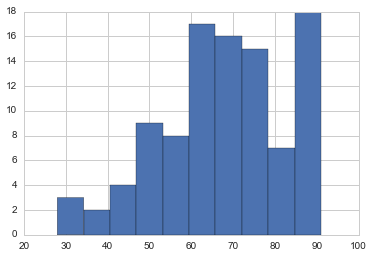

In [13]:
df['4-yr_gradrate'].hist(bins=10)

In [14]:
df.describe()

,rank,admitrate,4-yr_gradrate,totalcostperyr,avg_need-based_aid,avg_non-need-based_aid,of_non-need-based_aid,avg_debt_at_graduation,salary_yardstick
count,100.000000,99.000000,99.000000,99.000000,99.000000,8.000000,96.000000,99.000000,99.000000
mean,50.500000,49.191919,67.757576,54714.525253,24441.919192,62.500000,41.593750,28906.252525,56860.606061
std,29.011492,23.463683,14.980321,9007.459678,9899.824129,176.776695,26.800463,5788.353748,12614.753415
min,1.000000,5.000000,28.000000,34280.000000,3209.000000,0.000000,0.000000,12104.000000,32200.000000
25%,25.750000,34.500000,59.000000,47670.000000,16904.500000,0.000000,20.000000,26000.000000,46550.000000
50%,50.500000,51.000000,69.000000,58257.000000,23155.000000,0.000000,41.500000,29187.000000,55600.000000
75%,75.250000,68.000000,79.000000,62737.500000,31466.000000,0.000000,64.250000,33162.500000,66050.000000
max,100.000000,95.000000,91.000000,66400.000000,45710.000000,500.000000,98.000000,41814.000000,91600.000000


In [15]:
df.corr()

,rank,admitrate,4-yr_gradrate,totalcostperyr,avg_need-based_aid,avg_non-need-based_aid,of_non-need-based_aid,avg_debt_at_graduation,salary_yardstick
rank,1.000000,0.744628,-0.615147,-0.504771,-0.674005,0.710329,0.531802,0.632313,-0.594089
admitrate,0.744628,1.000000,-0.610265,-0.739521,-0.747229,0.529253,0.680979,0.535297,-0.713391
4-yr_gradrate,-0.615147,-0.610265,1.000000,0.689985,0.721858,0.176227,-0.572202,-0.306824,0.526830
totalcostperyr,-0.504771,-0.739521,0.689985,1.000000,0.759331,0.392053,-0.517273,-0.303111,0.748011
avg_need-based_aid,-0.674005,-0.747229,0.721858,0.759331,1.000000,-0.269096,-0.525087,-0.423055,0.681809
avg_non-need-based_aid,0.710329,0.529253,0.176227,0.392053,-0.269096,1.000000,1.000000,0.618631,-0.316908
of_non-need-based_aid,0.531802,0.680979,-0.572202,-0.517273,-0.525087,1.000000,1.000000,0.415575,-0.494626
avg_debt_at_graduation,0.632313,0.535297,-0.306824,-0.303111,-0.423055,0.618631,0.415575,1.000000,-0.340863
salary_yardstick,-0.594089,-0.713391,0.526830,0.748011,0.681809,-0.316908,-0.494626,-0.340863,1.000000


In [16]:
df = df.fillna(0)
df.head(5)

,rank,name,state,admitrate,4-yr_gradrate,totalcostperyr,avg_need-based_aid,avg_non-need-based_aid,of_non-need-based_aid,avg_debt_at_graduation,salary_yardstick
0,1,"Princeton University, Princeton",NJ,0,0,58660,0,0,0,0,0
1,2,"Harvard University, Cambridge",MA,6,86,61659,44430,0,0,15117,87200
2,3,"Vanderbilt University, Nashville",TN,13,88,61470,39953,0,20,20790,60900
3,4,"Rice University, Houston",TX,15,82,56703,34954,0,21,22241,59900
4,5,"Yale University, New Haven",CT,6,87,63250,45710,0,0,14853,66000


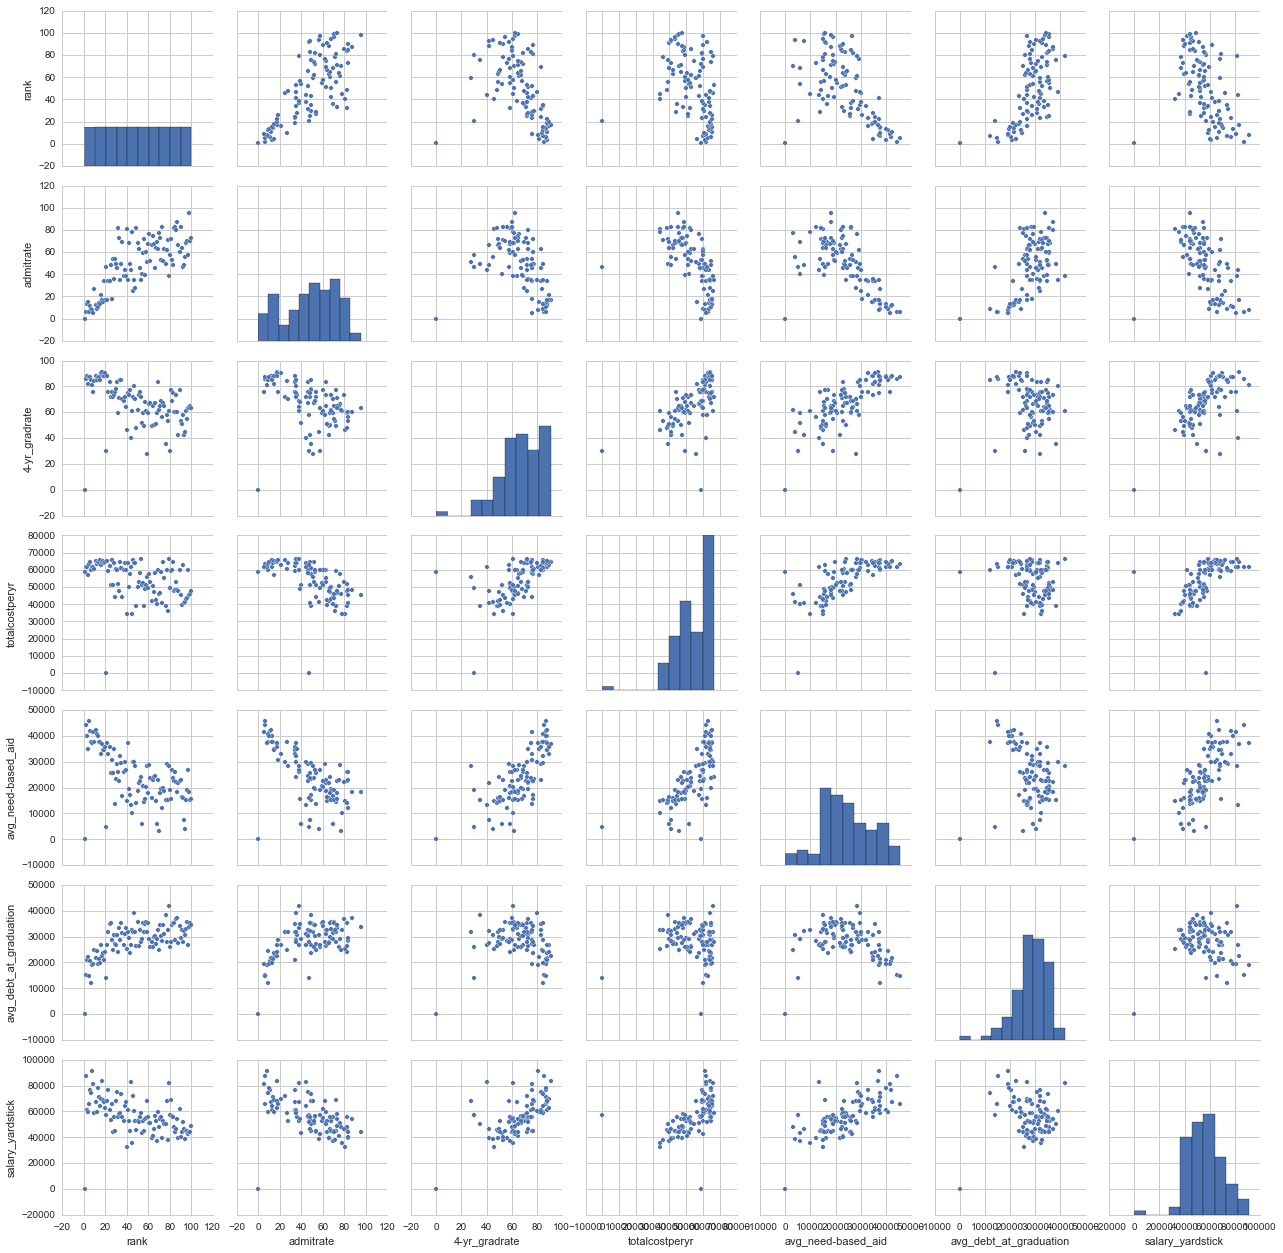

In [17]:
sns.pairplot(df[['rank','admitrate','4-yr_gradrate','totalcostperyr','avg_need-based_aid','avg_debt_at_graduation','salary_yardstick']]);

In [18]:
c = df.corr().abs()

In [19]:
c

,rank,admitrate,4-yr_gradrate,totalcostperyr,avg_need-based_aid,avg_non-need-based_aid,of_non-need-based_aid,avg_debt_at_graduation,salary_yardstick
rank,1.000000,0.753260,0.480290,0.375024,0.602867,0.099229,0.575327,0.633978,0.461927
admitrate,0.753260,1.000000,0.458280,0.621061,0.659990,0.134214,0.714093,0.560630,0.550764
4-yr_gradrate,0.480290,0.458280,1.000000,0.621152,0.737470,0.129067,0.469179,0.063983,0.607639
totalcostperyr,0.375024,0.621061,0.621152,1.000000,0.706525,0.107172,0.449513,0.120864,0.561060
avg_need-based_aid,0.602867,0.659990,0.737470,0.706525,1.000000,0.128890,0.506009,0.258929,0.702155
avg_non-need-based_aid,0.099229,0.134214,0.129067,0.107172,0.128890,1.000000,0.135639,0.031370,0.084363
of_non-need-based_aid,0.575327,0.714093,0.469179,0.449513,0.506009,0.135639,1.000000,0.469563,0.411218
avg_debt_at_graduation,0.633978,0.560630,0.063983,0.120864,0.258929,0.031370,0.469563,1.000000,0.092374
salary_yardstick,0.461927,0.550764,0.607639,0.561060,0.702155,0.084363,0.411218,0.092374,1.000000


In [20]:
s = c.unstack()
so = s.order(kind="quicksort")

In [21]:
so[(so > 0.69) & (so < 0.9)].sort_values(ascending=False).drop_duplicates()

admitrate           rank                     0.753260
avg_need-based_aid  4-yr_gradrate            0.737470
admitrate           of_non-need-based_aid    0.714093
avg_need-based_aid  totalcostperyr           0.706525
salary_yardstick    avg_need-based_aid       0.702155
dtype: float64

In [22]:
so[(so < 0.4)].sort_values(ascending=True).drop_duplicates()

avg_debt_at_graduation  avg_non-need-based_aid    0.031370
4-yr_gradrate           avg_debt_at_graduation    0.063983
salary_yardstick        avg_non-need-based_aid    0.084363
                        avg_debt_at_graduation    0.092374
avg_non-need-based_aid  rank                      0.099229
                        totalcostperyr            0.107172
totalcostperyr          avg_debt_at_graduation    0.120864
avg_need-based_aid      avg_non-need-based_aid    0.128890
4-yr_gradrate           avg_non-need-based_aid    0.129067
admitrate               avg_non-need-based_aid    0.134214
avg_non-need-based_aid  of_non-need-based_aid     0.135639
avg_debt_at_graduation  avg_need-based_aid        0.258929
rank                    totalcostperyr            0.375024
dtype: float64

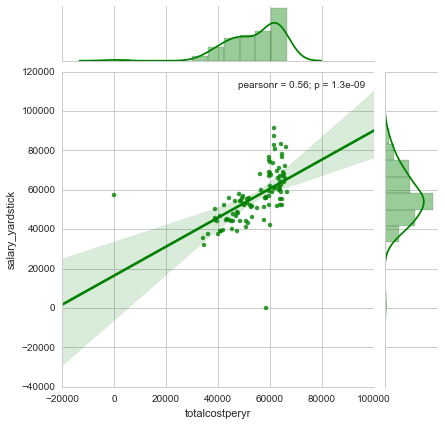

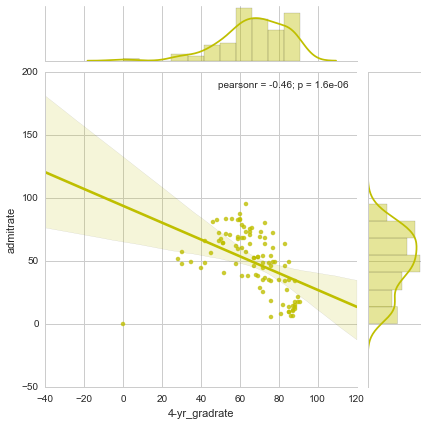

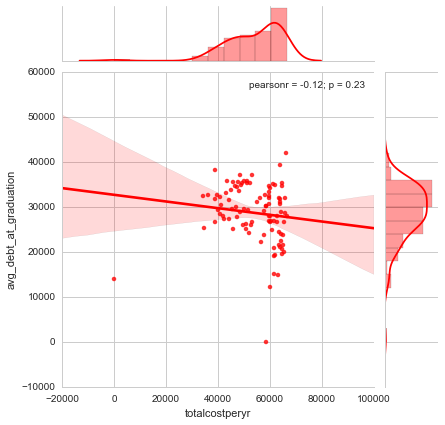

In [23]:
sns.jointplot(x="totalcostperyr", y="salary_yardstick", data=df, kind = "reg",color='g');
sns.jointplot(x="4-yr_gradrate", y="admitrate", data=df, kind = "reg",color='y');
sns.jointplot(x="totalcostperyr", y="avg_debt_at_graduation", data=df, kind = "reg",color='r');